In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE
from sklearn.linear_model import LinearRegression, LassoCV

In [81]:
df = pd.read_csv('train.csv')

In [82]:
df.Electrical.value_counts(normalize = True)

SBrkr    0.914325
FuseA    0.064428
FuseF    0.018506
FuseP    0.002056
Mix      0.000685
Name: Electrical, dtype: float64

In [83]:
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [84]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Missing Values

In [85]:
missing_values = df.isnull().sum()
cols_missing_values = missing_values[missing_values > 0].sort_values()
cols_missing_values

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

### Electrical - filled with dominant class

In [86]:
print(df.Electrical.value_counts(normalize = True))
df.Electrical.fillna('SBrkr', inplace = True)

SBrkr    0.914325
FuseA    0.064428
FuseF    0.018506
FuseP    0.002056
Mix      0.000685
Name: Electrical, dtype: float64


### MasVnrType - filled with dominant class 

In [87]:
print(df.MasVnrType.value_counts())
df.MasVnrType.fillna('None', inplace = True)

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


### MasVnrArea - filled with 0 class to match class type

In [88]:
print(df.MasVnrArea.value_counts())
df.MasVnrArea.fillna(0, inplace = True)

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64


### BsmtQual, BsmtCond, BsmtFinType1, BsmtExposure,BsmtFinType2 - Filled with NA to indicate no basement (from data description file)

In [89]:
df.BsmtQual.fillna('NA', inplace = True)

In [90]:
df.BsmtCond.fillna('NA', inplace = True)

In [91]:
df.BsmtFinType1.fillna('NA', inplace = True)

In [92]:
df.BsmtExposure.fillna('NA', inplace = True)

In [93]:
df.BsmtFinType2.fillna('NA', inplace = True)

### Garage - Filled with NA to indicate no garage (from data description file)

In [94]:
df.GarageType.fillna('NA', inplace = True)

In [95]:
df.GarageYrBlt.fillna('NA', inplace = True)

In [96]:
df.GarageFinish.fillna('NA', inplace = True)

In [97]:
df.GarageQual.fillna('NA', inplace = True)

In [98]:
df.GarageCond.fillna('NA', inplace = True)

### LotFrontage

In [99]:
df.LotFrontage.fillna(np.mean(df.LotFrontage), inplace = True)

### FireplaceQu

In [100]:
df.FireplaceQu.fillna('NA', inplace = True)

### Fence

In [101]:
df.Fence.fillna('NA', inplace = True)

### Alley

In [102]:
df.Alley.fillna('NA', inplace = True)

### Pool

In [103]:
df.PoolQC.fillna('NA', inplace = True)

### Misc Features

In [104]:
df.MiscFeature.fillna('None', inplace = True)

### Missing Values Removed

In [105]:
missing_values = df.isnull().sum()
cols_missing_values = missing_values[missing_values > 0].sort_values()
cols_missing_values

Series([], dtype: int64)

# Columns Examination


In [106]:
cols_to_plot = ['LotFrontage', 'LotArea', 'OverallQual', 'HouseStyle', 'OverallCond', 'YearBuilt', 'YearRemodAdd'
               'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd',
               'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice']


In [107]:
a = list(df.columns)
for i in a:
    print(i)
    print(df[i].value_counts(normalize = True))
    print('----------------------------')

Id
1       0.000685
982     0.000685
980     0.000685
979     0.000685
978     0.000685
          ...   
485     0.000685
484     0.000685
483     0.000685
482     0.000685
1460    0.000685
Name: Id, Length: 1460, dtype: float64
----------------------------
MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
----------------------------
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
----------------------------
LotFrontage
70.049958     0.177397
60.000000     0.097945
70.000000     0.047945
80.000000     0.047260
50.000000     0.039041
                ...   
137.000000    0.000685
38.000000     0.000685
33.000000     0.000685
150.000000    0.000685
46.000000     0.00

In [108]:
df.shape

(1460, 81)

In [109]:
#cols wo enough variance, drop
cols_to_drop = ['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities','LandSlope', 'Condition1', 'Condition2',
               'BldgType','RoofMatl', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'LowQualFinSF', 'BsmtHalfBath',
               'Functional', 'FireplaceQu', 'GarageYrBlt','GarageQual','GarageCond','PavedDrive', 'EnclosedPorch', 
                '3SsnPorch', 'PoolQC', 'MiscFeature', 'MiscVal', 'ExterCond', 'PoolArea']
df.drop(cols_to_drop, inplace = True, axis = 1)





In [110]:
#cols that need to be condensed
cols_to_combine = ['LotShape', 'LotConfig', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                  'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC'
                  'Electrical', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
                  'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'PoolArea', 'Fence', 'SaleType',
                  'SaleCondition']

## Column Condensation

In [111]:
#cols that need to be condensed
cols_to_combine = ['LotShape', 'LotConfig', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                  'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC'
                  'Electrical', 'FullBath', 'HalfBath', 'KitchenQual',
                  'GarageType', 'GarageFinish', 'GarageCars', 'Fence', 'SaleType',
                  'SaleCondition']

In [112]:
#LotShape
for i in range(len(df.LotShape)):
    if df.LotShape[i] == 'Reg':
        df['LotShape'][i] = 1
    else:
        df['LotShape'][i] = 0
df.LotShape = df.LotShape.astype(int)

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/2781037067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LotShape'][i] = 1
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/2781037067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LotShape'][i] = 0


In [113]:
print(df.LotConfig.value_counts())
for i in range(len(df.LotConfig)):
    if df.LotConfig[i] == 'Inside':
        df['LotConfig'][i] = 1
    else:
        df['LotConfig'][i] = 0
df.LotConfig = df.LotConfig.astype(int)

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/3818402175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LotConfig'][i] = 1
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/3818402175.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LotConfig'][i] = 0


In [114]:
print(df.HouseStyle.value_counts())

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


In [115]:
for i in range(len(df.HouseStyle)):
    if df.HouseStyle[i] in ('SLvl', 'SFoyer', '1.5Unf', '2.5Unf', '2.5Fin'):
        df.HouseStyle[i] = 'Other'

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/294716839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.HouseStyle[i] = 'Other'


In [116]:
print(df.RoofStyle.value_counts())
for i in range(len(df.RoofStyle)):
    if df.RoofStyle[i] == 'Gable':
        df['RoofStyle'][i] = 1
    else:
        df['RoofStyle'][i] = 0
df.RoofStyle = df.RoofStyle.astype(int)

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/2938447201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RoofStyle'][i] = 1
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/2938447201.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RoofStyle'][i] = 0


In [117]:
cols_to_combine = ['LotShape', 'LotConfig', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                  'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC'
                  'Electrical', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
                  'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'PoolArea', 'Fence', 'SaleType',
                  'SaleCondition']

In [118]:
df.Exterior1st.value_counts()
for i in range(len(df.Exterior1st)):
    if df.Exterior1st[i] in ('CemntBd', 'BrkFace', 'WdShing', 'Stucco', 'AsbShng', 'BrkComm', 'Stone', 'AsphShn', 'ImStucc', 'CBlock'):
        df.Exterior1st[i] = 'Other'


/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/1196565600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Exterior1st[i] = 'Other'


In [119]:
df.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Other      189
Plywood    108
Name: Exterior1st, dtype: int64

In [120]:
df.Exterior2nd.value_counts()
for i in range(len(df.Exterior2nd)):
    if df.Exterior2nd[i] in ('CmentBd', 'Wd Shng', 'Brk Cmn','CemntBd', 'BrkFace', 'WdShing', 'Stucco', 'AsbShng', 'BrkComm', 'Stone', 'AsphShn', 'ImStucc', 'CBlock'):
        df.Exterior2nd[i] = 'Other'

        
        
        

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/3267484466.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Exterior2nd[i] = 'Other'


In [121]:
df.MasVnrType.value_counts(normalize = True)
for i in range(len(df.MasVnrType)):
    if df.MasVnrType[i] == 'None':
        df['MasVnrType'][i] = 0
    else:
        df['MasVnrType'][i] = 1
df.MasVnrType = df.MasVnrType.astype(int)

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/759675410.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MasVnrType'][i] = 1
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/759675410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MasVnrType'][i] = 0


In [122]:
df.ExterQual.value_counts(normalize = True)
for i in range(len(df.ExterQual)):
    if df.ExterQual[i] == 'Fa':
        df['ExterQual'][i] = 'TA'


/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/4159801003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExterQual'][i] = 'TA'


In [123]:
df.Foundation.value_counts(normalize = True)
for i in range(len(df.Foundation)):
    if df.Foundation[i] in ('Slab', 'Stone', 'Wood'):
        df['Foundation'][i] = 'Other'

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/2142469530.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Foundation'][i] = 'Other'


In [124]:
df.BsmtQual.value_counts(normalize = True)

TA    0.444521
Gd    0.423288
Ex    0.082877
NA    0.025342
Fa    0.023973
Name: BsmtQual, dtype: float64

In [125]:
df.BsmtQual.value_counts(normalize = True)
for i in range(len(df.BsmtQual)):
    if df.BsmtQual[i] in ('NA', 'Fa', 'TA'):
        df['BsmtQual'][i] = 0
    else:
        df['BsmtQual'][i] = 1
        
df.BsmtQual = df.BsmtQual.astype(int)

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/470064949.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtQual'][i] = 1
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/470064949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtQual'][i] = 0


In [126]:
df.BsmtExposure.value_counts(normalize = True)
for i in range(len(df.BsmtExposure)):
    if df.BsmtExposure[i] in ('No', 'NA'):
        df['BsmtExposure'][i] = 0
    else:
        df['BsmtExposure'][i] = 1
df.BsmtExposure = df.BsmtExposure.astype(int)

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/247686851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtExposure'][i] = 0
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/247686851.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtExposure'][i] = 1


In [127]:
df.BsmtFinType1.value_counts(normalize = True)
for i in range(len(df.BsmtFinType1)):
    if df.BsmtFinType1[i] in ('Unf', 'NA'):
        df['BsmtFinType1'][i] = 0
    elif df.BsmtFinType1[i] in ('Rec', 'BLQ', 'LwQ'):
        df['BsmtFinType1'][i] = 1
    else:
        df.BsmtFinType1[i] = 2
df.BsmtFinType1 = df.BsmtFinType1.astype(int)

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/3712774254.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.BsmtFinType1[i] = 2
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/3712774254.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtFinType1'][i] = 0
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/3712774254.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtF

In [128]:
df.HeatingQC.value_counts(normalize = True)
for i in range(len(df.HeatingQC)):
    if df.HeatingQC[i] in ('Ex'):
        df['HeatingQC'][i] = 1
    else:
        df['HeatingQC'][i] = 0
df.HeatingQC = df.HeatingQC.astype(int)

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/388256620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HeatingQC'][i] = 1
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/388256620.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HeatingQC'][i] = 0


In [129]:
df.Electrical.value_counts(normalize = True)
for i in range(len(df.Electrical)):
    if df.Electrical[i] in ('SBrkr'):
        df['Electrical'][i] = 1
    else:
        df['Electrical'][i] = 0
df.Electrical = df.Electrical.astype(int)

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/57908917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electrical'][i] = 1
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/57908917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electrical'][i] = 0


In [130]:
df.HalfBath.value_counts(normalize = True)
df.FullBath.value_counts(normalize = True)

df['NoBath'] = df.FullBath + df.HalfBath/2

df.drop(['HalfBath', 'FullBath'], inplace = True, axis = 1)

df.NoBath = df.NoBath.astype(int)

In [131]:
df.KitchenQual.value_counts()
for i in range(len(df.KitchenQual)):
    if df.KitchenQual[i] in ('Fa', 'TA'):
        df['KitchenQual'][i] = 0
    elif df.KitchenQual[i] in ('Gd'):
        df['KitchenQual'][i] = 1
    else:
        df['KitchenQual'][i] = 2
df.KitchenQual = df.KitchenQual.astype(int)

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/907471647.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KitchenQual'][i] = 1
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/907471647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KitchenQual'][i] = 0
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/907471647.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kitchen

In [132]:
df.GarageType.value_counts()
for i in range(len(df.GarageType)):
    if df.GarageType[i] in ('NA'):
        df['GarageType'][i] = 0
    else:
        df['GarageType'][i] = 1
df.GarageType = df.GarageType.astype(int)

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/2822248388.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageType'][i] = 1
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/2822248388.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageType'][i] = 0


In [133]:
df.GarageFinish.value_counts()
for i in range(len(df.GarageFinish)):
    if df.GarageFinish[i] == 'NA':
        df['GarageFinish'][i] = 0
    elif df.GarageFinish[i] in ('Unf', 'RFn'):
        df['GarageFinish'][i] = 1
    else:
        df['GarageFinish'][i] = 2
df.GarageFinish = df.GarageFinish.astype(int)

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/4018930615.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageFinish'][i] = 1
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/4018930615.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageFinish'][i] = 2
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/4018930615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ga

In [134]:
df.Fence.value_counts()
for i in range(len(df.Fence)):
    if df.Fence[i] == 'NA':
        df['Fence'][i] = 0
    else:
        df['Fence'][i] = 1
df.Fence = df.Fence.astype(int)

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/1206707344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fence'][i] = 0
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/1206707344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fence'][i] = 1


In [135]:
df['SaleType'].value_counts()
for i in range(len(df.SaleType)):
    if df.SaleType[i] in ('WD', 'New'):
        df['SaleType'][i] = 1
    else:
        df['SaleType'][i] = 0
df.SaleType = df.SaleType.astype(int)

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/1826895165.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SaleType'][i] = 1
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/1826895165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SaleType'][i] = 0


In [136]:
df['SaleCondition'].value_counts()
for i in range(len(df.SaleCondition)):
    if df.SaleCondition[i] == 'Normal':
        df['SaleCondition'][i] = 1
    else:
        df['SaleCondition'][i] = 0
df.SaleCondition = df.SaleCondition.astype(int)

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/1540965375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SaleCondition'][i] = 1
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/1540965375.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SaleCondition'][i] = 0


In [137]:
df['CentralAir'].value_counts()
for i in range(len(df.CentralAir)):
    if df.CentralAir[i] == 'Y':
        df['CentralAir'][i] = 1
    else:
        df['CentralAir'][i] = 0
df.CentralAir = df.CentralAir.astype(int)

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/2595878739.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CentralAir'][i] = 1
/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_3494/2595878739.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CentralAir'][i] = 0


In [138]:
cols_to_dummies = ['Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation']

In [139]:
df = pd.get_dummies(df, cols_to_dummies, drop_first = True)

In [140]:
df.to_csv('cleaned_data.csv')

In [141]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'Fence', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice', 'NoBath',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighb

In [142]:
df.YearBuilt.apply(pd.to_datetime, 'year')
year = 2010
df['YrsOld'] = (year - df['YearBuilt'])

In [143]:
df['YrsOld']

0        7
1       34
2        9
3       95
4       10
        ..
1455    11
1456    32
1457    69
1458    60
1459    45
Name: YrsOld, Length: 1460, dtype: int64

In [144]:
df.YearRemodAdd.apply(pd.to_datetime, 'year')
df['YrsSinceRemod'] = (year - df['YearRemodAdd'])

In [145]:
df['YrsSinceRemod']

0        7
1       34
2        8
3       40
4       10
        ..
1455    10
1456    22
1457     4
1458    14
1459    45
Name: YrsSinceRemod, Length: 1460, dtype: int64

In [146]:
df.drop(['YearRemodAdd', 'YearBuilt'], axis = 1, inplace = True)

In [147]:
df.to_csv('cleaned_data.csv')

In [ ]:
y = df.SalePrice;
df.drop('SalePrice', inplace = True, axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)

In [ ]:
X_train

In [ ]:
k = 12

In [ ]:
mi_transformer = SelectKBest(mutual_info_regression, k = k).fit(X_train, y_train)
mi_X_train = SelectKBest(mutual_info_regression, k = k).fit_transform(X_train, y_train)
mi_X_test = mi_transformer.transform(X_test)

In [ ]:
#np.sort(mi_transformer.scores_)

In [ ]:
miEst = LinearRegression().fit(mi_X_train, y_train)

In [ ]:
miEst.predict(mi_X_test)

In [ ]:
miEst.predict(mi_X_train)[miEst.predict(mi_X_train) < 0]

In [ ]:
miEst.predict(mi_X_test)[miEst.predict(mi_X_test) < 0]

In [ ]:
len(miEst.predict(mi_X_test))

In [ ]:
from sklearn.metrics import mean_squared_log_error
#print(f"The mean squared error when training on the MI selected features is {mean_squared_log_error(y_train, miEst.predict(mi_X_train))}.")
print(f"When testing on the test data, the mean squared log error is {mean_squared_log_error(y_test, miEst.predict(mi_X_test))}")




In [ ]:
X_pred = miEst.predict(mi_X_test)

In [ ]:
1 - (1-miEst.score(mi_X_test, y_test))*(len(y_test)-1)/(len(y_test)-mi_X_test.shape[1]-1)

# Plotting

In [ ]:
cols_to_plot = ['LotFrontage', 'LotArea', 'OverallQual', 'HouseStyle', 'OverallCond', 'YearBuilt', 'YearRemodAdd'
               'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd',
               'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice']



/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_96266/761734963.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.YrSold);


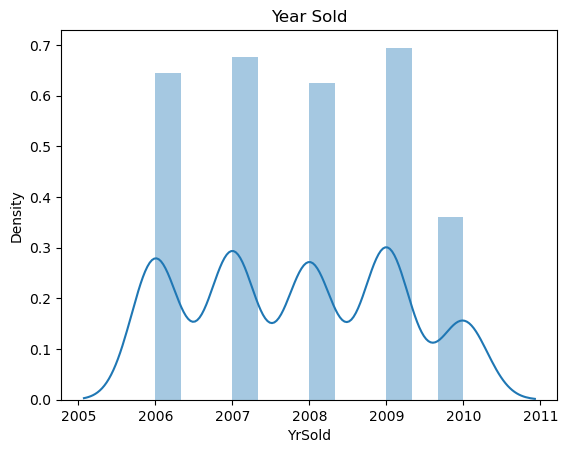

In [26]:
sns.distplot(df.YrSold);
plt.title('Year Sold')
plt.show()

In [ ]:
#sns.distplot(np.log(df.LotArea))

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_96266/1109977512.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a = sns.distplot(df.OverallQual)


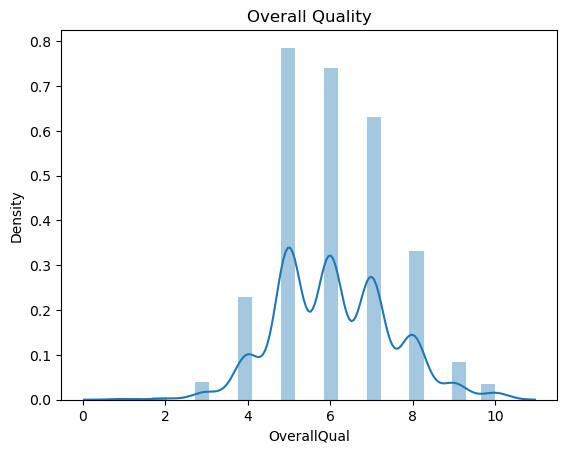

In [25]:
a = sns.distplot(df.OverallQual)
plt.title("Overall Quality"); 

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_96266/1704259678.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


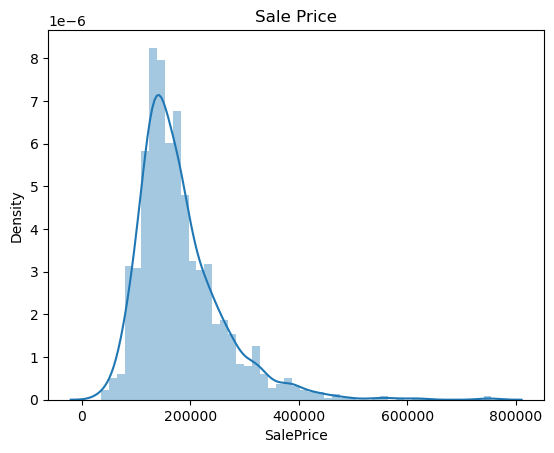

In [31]:

y = df['SalePrice']
sns.distplot(y)
plt.title('Sale Price')
plt.show()

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_96266/645695110.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.OverallQual)


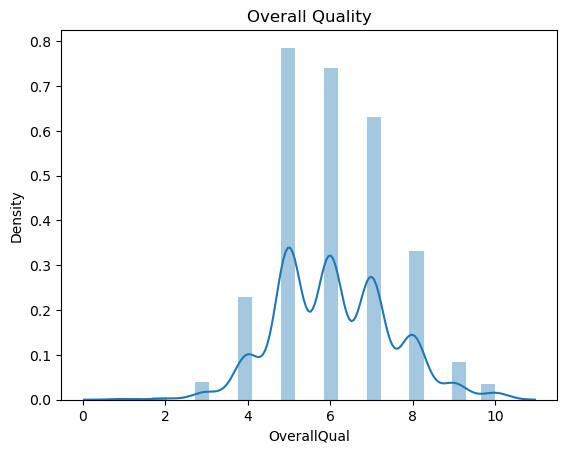

In [32]:
sns.distplot(df.OverallQual)
plt.title("Overall Quality"); 